# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [1]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python2.7/dist-packages (0.24.2)


In [2]:
import pandas as pd
import numpy as np
pd.__version__

u'0.24.2'

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [3]:
_data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

data_frame = pd.DataFrame(data = _data, index = _labels)
print("good, next")
data_frame

good, next


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [4]:
print(data_frame.describe())
print()
print(data_frame.info())
print("good, next")

            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000
()
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None
good, next


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [5]:
print("_____using head_______")
print(data_frame.head(3))
print("______________________")
print()
print("_____using iloc_______")
print(data_frame.iloc[0:3])
print("______________________")
print("good, next")

_____using head_______
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
______________________
()
_____using iloc_______
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
______________________
good, next


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [6]:
print(data_frame[['animal', 'age']])
print("good, next")

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0
good, next


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [7]:
print(data_frame.loc[['c','d','h'],['animal','age']])
print("good, next")

  animal  age
c  snake  0.5
d    dog  NaN
h    cat  NaN
good, next


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [8]:
visited = data_frame['visits'] >= 3
print(data_frame[visited])
print("good, next")

   age animal priority  visits
b  3.0    cat      yes       3
d  NaN    dog      yes       3
f  2.0    cat       no       3
good, next


```Select the rows where the age is missing, i.e. is `NaN`.```

In [9]:
none_age = np.isnan(data_frame['age'])
print(data_frame[none_age])
print("good, next")

   age animal priority  visits
d  NaN    dog      yes       3
h  NaN    cat      yes       1
good, next


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [10]:
is_cat = data_frame['animal'] == 'cat'
less3 = data_frame['age'] < 3
print(data_frame[is_cat & less3])
print("good, next")

   age animal priority  visits
a  2.5    cat      yes       1
f  2.0    cat       no       3
good, next


```Select the rows the age is between 2 and 4 (inclusive).```

In [11]:
more_and2 = data_frame['age'] >= 2
less_and4 = data_frame['age'] <= 4
print(data_frame[more_and2 & less_and4])
print("good, next")

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
f  2.0    cat       no       3
j  3.0    dog       no       1
good, next


```Change the age in row 'f' to 1.5.```

In [12]:
data_frame['age']['f'] = 1.5
print(data_frame)
print("good, next")

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1
good, next


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [13]:
print(data_frame['visits'].sum())
print(np.sum(data_frame['visits']))
print("good, next")

19
19
good, next


```Calculate the mean age for each different animal in `df`.```

In [14]:
print(data_frame['age'].mean())
print("good, next")

3.375
good, next


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [15]:
new_data = {'animal': ['cat'], 'age': [4.5], 'visits': [ 4], 'priority': ['no']}
new_labels = ['k']
df = pd.DataFrame(data = new_data, index = new_labels)
data_frame = data_frame.append(other = df)
print("data frame after adding a row:")
print(data_frame)
data_frame = data_frame.drop(data_frame.index[-1])
print("data frame after deleting a row:")
print(data_frame)
print("good, next")

data frame after adding a row:
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1
k  4.5    cat       no       4
data frame after deleting a row:
   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  1.5    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1
good, next


```Count the number of each type of animal in `df`.```

In [16]:

print("num of cats is:")
print(len(data_frame[data_frame['animal'] == 'cat']))
print("num of dogs is:")
print(len(data_frame[data_frame['animal'] == 'dog']))
print("num of snakes is:")
print(len(data_frame[data_frame['animal'] == 'snake']))
print("good, next")

num of cats is:
4
num of dogs is:
4
num of snakes is:
2
good, next


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [17]:
data_frame = data_frame.sort_values(by = ['age','visits'], ascending = [False, True])
print(data_frame)
print("good, next")

   age animal priority  visits
i  7.0    dog       no       2
e  5.0    dog       no       2
g  4.5  snake       no       1
j  3.0    dog       no       1
b  3.0    cat      yes       3
a  2.5    cat      yes       1
f  1.5    cat       no       3
c  0.5  snake       no       2
h  NaN    cat      yes       1
d  NaN    dog      yes       3
good, next


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [18]:
for index, row in data_frame.iterrows():
  data_frame["priority"][index] = ( row["priority"] == 'yes' )
print(data_frame)
print("good, next")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


   age animal priority  visits
i  7.0    dog    False       2
e  5.0    dog    False       2
g  4.5  snake    False       1
j  3.0    dog    False       1
b  3.0    cat     True       3
a  2.5    cat     True       1
f  1.5    cat    False       3
c  0.5  snake    False       2
h  NaN    cat     True       1
d  NaN    dog     True       3
good, next


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [19]:
for index, row in data_frame.iterrows():
  if row["animal"] == 'snake':
    data_frame["animal"][index] = 'python'
print(data_frame)
print("good, next")

   age  animal priority  visits
i  7.0     dog    False       2
e  5.0     dog    False       2
g  4.5  python    False       1
j  3.0     dog    False       1
b  3.0     cat     True       3
a  2.5     cat     True       1
f  1.5     cat    False       3
c  0.5  python    False       2
h  NaN     cat     True       1
d  NaN     dog     True       3
good, next


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [20]:
pivot = pd.pivot_table(data=data_frame, values = 'age', index = 'animal', columns = 'visits')
print(pivot)

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [47]:
arr_age = np.random.randint(20,65,1000)
arr_skill = np.random.normal(0.5,0.3, 1000)
arr_height = np.around(np.random.uniform(1.5,2.0,1000), decimals=2)

big_data = {'age': arr_age, 'skill': arr_skill, 'height': arr_height }

data_frame2 = pd.DataFrame(data = big_data)
print("good, next")

good, next


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [22]:
arr_salary = 1000*((arr_age**2)/1000+1.7*arr_skill+0.4*np.exp((-1)*(arr_height-1.7)**2))
data_frame2 = data_frame2.assign(salary=pd.Series(arr_salary))
print("good, next")

good, next


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [23]:
group_age = data_frame2.groupby('age')
print("things for age: ")
print("num of groups is: " , group_age.size())
print("mean salary is: " , group_age['salary'].mean())
print("max height is: " , group_age['height'].max())

group_age_left = data_frame2.groupby(data_frame2['age']//10)
print("things for left digit of age: ")
print("num of groups is: " , group_age_left.size())
print("mean salary is: " , group_age_left['salary'].mean())
print("max height is: " , group_age_left['height'].max())

print("good, next")

things for age: 
('num of groups is: ', age
20    15
21    27
22    17
23    18
24    30
25    22
26    22
27    20
28    20
29    19
30    21
31    12
32    24
33    20
34    17
35    14
36    28
37    23
38    23
39    28
40    25
41    22
42    26
43    18
44    16
45    23
46    15
47    23
48    23
49    22
50    27
51    26
52    28
53    35
54    30
55    29
56    22
57    23
58    19
59    17
60    23
61    16
62    16
63    30
64    26
dtype: int64)
('mean salary is: ', age
20    1118.676315
21    1365.996381
22    1291.295933
23    1312.803499
24    1296.349200
25    1186.544875
26    1177.693709
27    1294.669083
28    1164.411744
29    1123.964068
30    1239.071214
31    1555.648696
32    2109.012483
33    2120.046481
34    2106.575826
35    2151.044550
36    2299.308776
37    2254.065200
38    2380.246157
39    2109.887792
40    2178.560457
41    2274.344804
42    2223.720059
43    2138.908457
44    2210.561213
45    3200.279446
46    3246.080615
47    3407.667666
48    31

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [24]:
group_age = data_frame2.groupby('age')
print(group_age['salary'].mean() / group_age['height'].max())

print("good, next")

age
20     595.040593
21     686.430342
22     648.892428
23     663.032070
24     668.221237
25     605.380038
26     594.794803
27     657.192428
28     588.086739
29     561.982034
30     645.349591
31     823.094548
32    1054.506242
33    1076.165726
34    1058.580817
35    1075.522275
36    1179.132706
37    1132.696080
38    1202.144524
39    1065.599895
40    1089.280229
41    1148.658992
42    1117.447266
43    1080.256796
44    1116.445057
45    1641.168947
46    1631.196289
47    1721.044276
48    1568.803024
49    1579.728252
50    1661.317405
51    1637.803648
52    1706.362572
53    1628.968512
54    1652.641152
55    2169.652142
56    2222.997187
57    2064.646944
58    2044.367556
59    2108.445455
60    2041.299766
61    1953.217840
62    2230.923281
63    2113.277105
64    2639.809387
dtype: float64
good, next


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

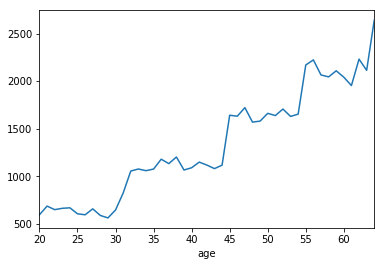

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

data = group_age['salary'].mean() / group_age['height'].max()
data.plot()

```Save the result as a csv```

In [26]:
data.to_csv("C:\\Users\\t8640232\\Desktop\\limonana\\file_1.csv")
print("good, next")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


good, next


## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [29]:
max_id = df['YearBuilt'].idxmax()
print(df['Id'][max_id])

379


In [30]:
houses_that_year = df[df['YearBuilt'] == df['YearBuilt'][max_id]]
print(houses_that_year['SalePrice'].max())

394432


In [31]:
print(df['LotArea'].mean())

10516.828082191782


In [32]:
print(df['LotArea'].median())

9478.5


In [33]:
has_fireplace = df['Fireplaces'] > 0
no_fireplace = df['Fireplaces'] == 0 
print(has_fireplace.count())
print(no_fireplace.count())

1460
1460


In [34]:
has_pools = df[df['PoolArea'] != 0]
print(has_pools['SalePrice'].mean())

288138.5714285714


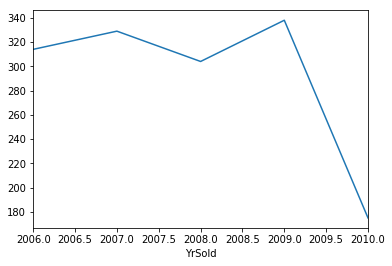

In [35]:
group_age = df.groupby('YrSold').size()
group_age.plot()

(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

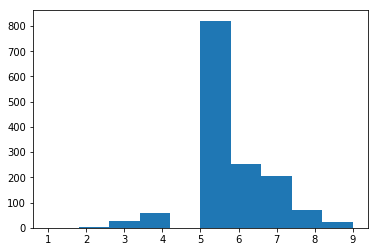

In [36]:
plt.hist(df['OverallCond'])

In [37]:
fireplace = df.groupby('Fireplaces')
print(fireplace['SalePrice'].mean())
print(2019 - fireplace['YearBuilt'].mean())

# print(fireplace.groupby('FullBath').size())


Fireplaces
0    141331.482609
1    211843.909231
2    240588.539130
3    252000.000000
Name: SalePrice, dtype: float64
Fireplaces
0    54.781159
1    39.150769
2    54.347826
3    38.400000
Name: YearBuilt, dtype: float64


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df['LotAreaSquare'] = df['LotArea']**2
df['TotalFlrSF'] = df['1stFlrSF']+ df['2ndFlrSF']
df['RootGarageArea'] = df['GarageArea']**(0.5)
df['NormalAreaBedrooms'] = df['LotArea'] / (df['BedroomAbvGr'] + 1)

tempdf = df.groupby(['YearBuilt']).mean().reset_index().loc[:,['YearBuilt', 'LotArea']]
merge = pd.merge(df, tempdf, on = "YearBuilt")
df['NormalAreaMeanInYear'] = merge['LotArea_x']/(merge['LotArea_y'] + 0.00001)


In [0]:
df['LotsAreaRank'] = df['LotArea'].rank()


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


<function matplotlib.pyplot.show>

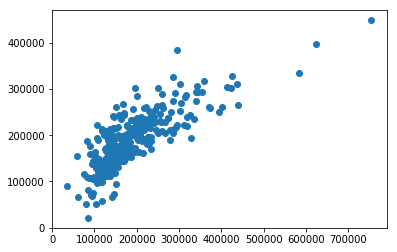

In [42]:
name_list = ['LotAreaSquare','TotalFlrSF', 'RootGarageArea', 'NormalAreaBedrooms', 'LotsAreaRank']
x = df[name_list]
y = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y)
a = StandardScaler().fit(x_train)
reg = LinearRegression()
reg.fit(a.transform(x_train), y_train)
y_test_predict = reg.predict(a.transform(x_test))
plt.scatter(y_test, y_test_predict)
plt.show

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')